<a href="https://colab.research.google.com/github/GarimaChopra/AML/blob/main/Project3_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3: The Heart Disease

In [1]:
# import library
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sbn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Read csv file
df = pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# describe data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#dataset info and summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Task 3. Check for any missing feature values and impute as necessary.

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

From above analysis we find that data contains no null values and all columns are numeric 

# Task 1. Plot distribution of age and sex for each target class.

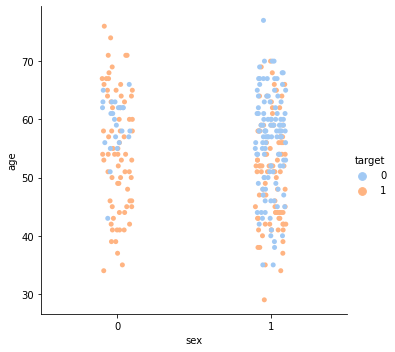

In [7]:
sbn.catplot(data=df, x='sex' , y='age',palette='pastel',hue='target')

From the above plot we find that there is high chances of heart disease in female than male.

# Task 2. Plot correlation values for all features with respect to the target class.

<AxesSubplot:>

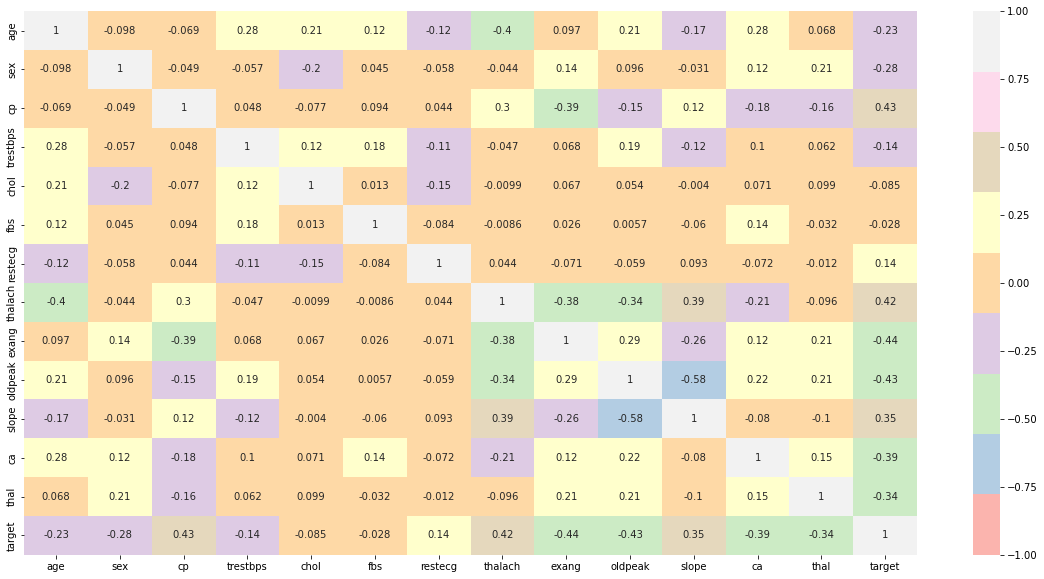

In [8]:
corr_matrix=df.corr()
plt.figure(figsize=(20,10))
sbn.heatmap(corr_matrix,annot=True,cmap='Pastel1', vmin=-1, vmax=+1)

Factors (cp,thalach, slope and restecg) has positive value with target as this factors affect the chances of heart disease.

# Task 4. Use an 80-20 rule to train and test the following ML models:

1. Logistic Regression
2. Random Forest
3. SGD Classifier




In [9]:
# Split the data set 
X = df.drop(columns = ['target'])
Y = df['target'] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 51)  
print("Shape of X_train= ",X_train.shape)
print("Shape of X_test= ",X_test.shape)
print("Shape of y_train= ",Y_train.shape)
print("Shape of y_test= ",Y_test.shape)

Shape of X_train=  (242, 13)
Shape of X_test=  (61, 13)
Shape of y_train=  (242,)
Shape of y_test=  (61,)


### Logistic Regression

In [10]:
# Logistic regression model

lr_classifier = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        solver='lbfgs', 
                        max_iter=1000,
                        verbose=2,
                        random_state=51
                        )

lr_classifier.fit(X_train, Y_train)

#print("logistic classifier coefficient value: ",lr_classifier.coef_)
print("logistic classifier class value: ",lr_classifier.classes_)




RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67742D+02    |proj g|=  3.01950D+03

At iterate    1    f=  1.66608D+02    |proj g|=  2.70007D+03

At iterate    2    f=  1.65818D+02    |proj g|=  8.72496D+02

At iterate    3    f=  1.65493D+02    |proj g|=  1.14469D+03

At iterate    4    f=  1.63362D+02    |proj g|=  2.22068D+03

At iterate    5    f=  1.60196D+02    |proj g|=  3.54287D+03

At iterate    6    f=  1.55224D+02    |proj g|=  4.04089D+03

At iterate    7    f=  1.49292D+02    |proj g|=  1.94494D+03

At iterate    8    f=  1.47033D+02    |proj g|=  4.18986D+02

At iterate    9    f=  1.46674D+02    |proj g|=  8.44172D+02

At iterate   10    f=  1.46326D+02    |proj g|=  1.08065D+03

At iterate   11    f=  1.45985D+02    |proj g|=  6.35172D+02

At iterate   12    f=  1.45891D+02    |proj g|=  8.56001D+01

At iterate   13    f=  1.4

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


te   17    f=  1.45691D+02    |proj g|=  7.79833D+02

At iterate   18    f=  1.45408D+02    |proj g|=  1.15194D+03

At iterate   19    f=  1.44809D+02    |proj g|=  1.46515D+03

At iterate   20    f=  1.43855D+02    |proj g|=  1.27042D+03

At iterate   21    f=  1.42602D+02    |proj g|=  6.87061D+02

At iterate   22    f=  1.41506D+02    |proj g|=  3.93512D+02

At iterate   23    f=  1.41126D+02    |proj g|=  6.30376D+02

At iterate   24    f=  1.41026D+02    |proj g|=  1.39395D+02

At iterate   25    f=  1.40941D+02    |proj g|=  2.50117D+02

At iterate   26    f=  1.40846D+02    |proj g|=  2.50631D+02

At iterate   27    f=  1.40090D+02    |proj g|=  5.78190D+02

At iterate   28    f=  1.37373D+02    |proj g|=  1.04808D+03

At iterate   29    f=  1.31269D+02    |proj g|=  1.32435D+03

At iterate   30    f=  1.25924D+02    |proj g|=  3.43636D+03

At iterate   31    f=  1.11656D+02    |proj g|=  2.12025D+03

At iterate   32    f=  1.02747D+02    |proj g|=  1.23723D+03

At iterate   33 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


   f=  9.46258D+01    |proj g|=  3.60581D+02

At iterate   34    f=  9.36792D+01    |proj g|=  9.27968D+01

At iterate   35    f=  9.36687D+01    |proj g|=  1.10681D+02

At iterate   36    f=  9.35803D+01    |proj g|=  1.05200D+02

At iterate   37    f=  9.35183D+01    |proj g|=  4.15801D+01

At iterate   38    f=  9.35043D+01    |proj g|=  6.25595D+00

At iterate   39    f=  9.35021D+01    |proj g|=  6.28034D+00

At iterate   40    f=  9.34546D+01    |proj g|=  2.40256D+01

At iterate   41    f=  9.33018D+01    |proj g|=  1.96557D+02

At iterate   42    f=  9.30058D+01    |proj g|=  1.80412D+02

At iterate   43    f=  9.08107D+01    |proj g|=  1.89415D+02

At iterate   44    f=  8.94835D+01    |proj g|=  2.05096D+02

At iterate   45    f=  8.92788D+01    |proj g|=  3.34428D+02

At iterate   46    f=  8.91351D+01    |proj g|=  3.01458D+02

At iterate   47    f=  8.87600D+01    |proj g|=  5.72806D+01

At iterate   48    f=  8.87119D+01    |proj g|=  3.82315D+00

At iterate   49    f=  8

In [11]:
# Accuracy scores on the training and testing sets

lr_train_score = lr_classifier.score(X_train, Y_train)
lr_test_score = lr_classifier.score(X_test, Y_test)

print ("Train score:",lr_train_score)
print ("Train score:",lr_test_score)

 f=  8.78701D+01    |proj g|=  3.65738D+00

At iterate  163    f=  8.78700D+01    |proj g|=  1.94769D+00

At iterate  164    f=  8.78699D+01    |proj g|=  2.52113D+00

At iterate  165    f=  8.78698D+01    |proj g|=  1.38992D+00

At iterate  166    f=  8.78697D+01    |proj g|=  5.06656D+00

At iterate  167    f=  8.78696D+01    |proj g|=  2.23175D+00

At iterate  168    f=  8.78696D+01    |proj g|=  1.71082D+00

At iterate  169    f=  8.78696D+01    |proj g|=  3.00946D+00

At iterate  170    f=  8.78695D+01    |proj g|=  7.88474D+00

At iterate  171    f=  8.78693D+01    |proj g|=  1.38869D+01

At iterate  172    f=  8.78686D+01    |proj g|=  2.22966D+01

At iterate  173    f=  8.78674D+01    |proj g|=  4.27762D+01

At iterate  174    f=  8.78655D+01    |proj g|=  1.23731D+01

At iterate  175    f=  8.78638D+01    |proj g|=  7.67667D+01

At iterate  176    f=  8.78619D+01    |proj g|=  3.00365D+01

At iterate  177    f=  8.78611D+01    |proj g|=  4.77974D+00

At iterate  178    f=  8.7

Text(0.5, 20.57999999999999, 'Prediction')

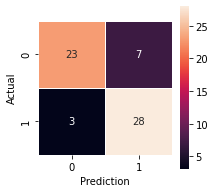

In [12]:
# The confusion matrix

lr_predictions = lr_classifier.predict(X_test)

labels = lr_classifier.classes_

# compute TP, TN, FP, FN values
lr_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

plt.figure(figsize=(3,3))
sbn.heatmap(lr_cm, annot=True,linewidths=.5, square = True);

plt.ylabel('Actual')
plt.xlabel('Prediction')

In [13]:
# Print the classification report 
lr_cr = classification_report(y_true=Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

print(lr_cr)

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.80      0.90      0.85        31

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



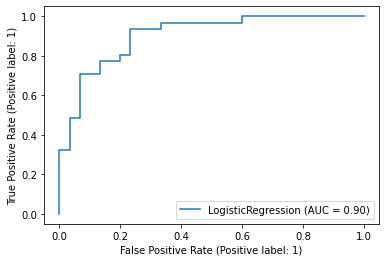

In [14]:
#Plotting ROC Curve with logistic regrssion
ax = plt.gca()
rfc_disp = plot_roc_curve(lr_classifier, X_test, Y_test, ax=ax)
plt.show()

# SGD classifier

In [15]:

sgd_classifier = SGDClassifier(max_iter=1000, tol=1e-5,random_state=0)
sgd_classifier.fit(X_train, Y_train)


SGDClassifier(random_state=0, tol=1e-05)

In [16]:
sgd_train_score = sgd_classifier.score(X_train, Y_train)
sgd_test_score = sgd_classifier.score(X_test, Y_test)

print ("Train score:",sgd_train_score)
print ("Train score:",sgd_test_score)

Train score: 0.6115702479338843
Train score: 0.6229508196721312


Text(0.5, 20.57999999999999, 'Prediction')

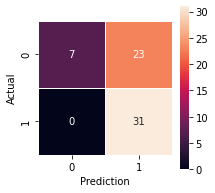

In [17]:
# The confusion matrix

sgd_predictions = sgd_classifier.predict(X_test)

labels = sgd_classifier.classes_

# compute TP, TN, FP, FN values
sgd_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

# Visualize the confusion matrix as a heatmap

plt.figure(figsize=(3,3))
sbn.heatmap(sgd_cm, annot=True, linewidths=.5, square = True);

plt.ylabel('Actual')
plt.xlabel('Prediction')

In [18]:
# compute recall, precision, f1-scores and print the classification report 

sgd_cr = classification_report(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)
print(sgd_cr)

              precision    recall  f1-score   support

           0       1.00      0.23      0.38        30
           1       0.57      1.00      0.73        31

    accuracy                           0.62        61
   macro avg       0.79      0.62      0.55        61
weighted avg       0.78      0.62      0.56        61



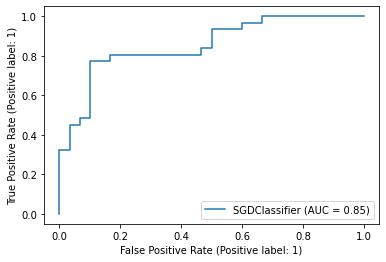

In [19]:
#Plotting ROC curve with sgd
ax = plt.gca()
rfc_disp = plot_roc_curve(sgd_classifier, X_test, Y_test, ax=ax)
plt.show()

### Random Forest

In [20]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, Y_train) 

# The confusion matrix
rf_predictions = rf_classifier.predict(X_test)

In [21]:
rf_train_score = rf_classifier.score(X_train, Y_train)
rf_test_score = rf_classifier.score(X_test, Y_test)

print ("Train score:",rf_train_score)
print ("Train score:",rf_test_score)

Train score: 1.0
Train score: 0.8360655737704918


Text(0.5, 20.57999999999999, 'Prediction')

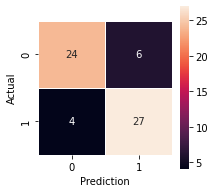

In [22]:
labels = rf_classifier.classes_

# compute TP, TN, FP, FN values
rf_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)

plt.figure(figsize=(3,3))
sbn.heatmap(rf_cm, annot=True, linewidths=.5, square = True);

plt.ylabel('Actual')
plt.xlabel('Prediction')

In [23]:
# Print the classification report 
# compute recall, precision, f1-scores
rf_cr = classification_report(y_true=Y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        30
           1       0.82      0.87      0.84        31

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



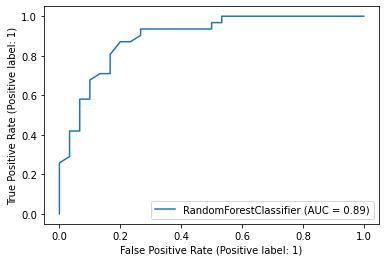

In [24]:
#Plotting ROC Curve with random forest classifier
ax = plt.gca()
rfc_disp = plot_roc_curve(rf_classifier, X_test, Y_test, ax=ax)
plt.show()

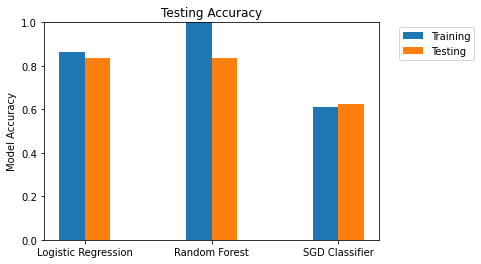

In [25]:
# Summarize the findings for all models

labels = ['Logistic Regression', 'Random Forest','SGD Classifier']
training_scores = [lr_train_score, rf_train_score, sgd_train_score]
testing_scores =  [lr_test_score, rf_test_score, sgd_test_score ]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Model Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0))

plt.title('Testing Accuracy')
plt.show()

From the above graph we can say that accuracy of the Random Forest (RF) model is higher than other model.

# Task 7. Verify whether or not scaling the data helps improve model accuracies.

### Standard Scalar with all 3 model

In [26]:
standardScaler = StandardScaler()
scaled_data = standardScaler.fit_transform(X)
scaled_data_ss = pd.DataFrame(scaled_data, columns=X.columns, index=X.index);
scaled_data_ss.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,5.825923e-17,-1.319077e-17,-5.562565e-17,-7.146832e-16,-9.828955e-17,-3.664102e-19,2.652810e-16,-5.203025e-16,-5.203025e-16,-3.140136e-16,1.355718e-16,4.752341e-16,3.484561e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-1.468418e+00,-9.385146e-01,-2.148802e+00,-2.324160e+00,-4.176345e-01,-1.005832e+00,-3.439267e+00,-6.966305e-01,-8.968617e-01,-2.274579e+00,-7.144289e-01,-3.784824e+00
25%,-7.572802e-01,-1.468418e+00,-9.385146e-01,-6.638668e-01,-6.814943e-01,-4.176345e-01,-1.005832e+00,-7.061105e-01,-6.966305e-01,-8.968617e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
50%,6.988599e-02,6.810052e-01,3.203122e-02,-9.273778e-02,-1.210553e-01,-4.176345e-01,8.989622e-01,1.466343e-01,-6.966305e-01,-2.067053e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
75%,7.316189e-01,6.810052e-01,1.002577e+00,4.783913e-01,5.456738e-01,-4.176345e-01,8.989622e-01,7.151309e-01,1.435481e+00,4.834512e-01,9.763521e-01,2.650822e-01,1.123029e+00
max,2.496240e+00,6.810052e-01,1.973123e+00,3.905165e+00,6.140401e+00,2.394438e+00,2.803756e+00,2.289429e+00,1.435481e+00,4.451851e+00,9.763521e-01,3.203615e+00,1.123029e+00


In [27]:
#Split data
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data_ss, Y, test_size=0.2,  random_state = 51)
print("Shape of X_train= ",X_train.shape)
print("Shape of X_test= ",X_test.shape)
print("Shape of y_train= ",Y_train.shape)
print("Shape of y_test= ",Y_test.shape)

Shape of X_train=  (242, 13)
Shape of X_test=  (61, 13)
Shape of y_train=  (242,)
Shape of y_test=  (61,)


 ### Logistic Model (standard scaling)

In [28]:
# Fit the model
lr_classifier.fit(X_train, Y_train)
#print("logistic classifier class value: ",lr_classifier.classes_)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67742D+02    |proj g|=  5.37964D+01



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=1000, random_state=51, verbose=2)

At iterate    1    f=  9.74001D+01    |proj g|=  1.54576D+01

At iterate    2    f=  9.08355D+01    |proj g|=  8.84314D+00

At iterate    3    f=  8.64633D+01    |proj g|=  3.00085D+00

At iterate    4    f=  8.58003D+01    |proj g|=  8.86228D-01

At iterate    5    f=  8.57516D+01    |proj g|=  7.24417D-01

At iterate    6    f=  8.57361D+01    |proj g|=  1.83713D-01

At iterate    7    f=  8.57353D+01    |proj g|=  2.59615D-02

At iterate    8    f=  8.57352D+01    |proj g|=  1.24747D-02

At iterate    9    f=  8.57352D+01    |proj g|=  5.42681D-03

At iterate   10    f=  8.57352D+01    |proj g|=  1.28136D-03

At iterate   11    f=  8.57352D+01    |proj g|=  6.00816D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F    

In [29]:
# Accuracy scores on the training and testing sets

lr_train_score_for_ss = lr_classifier.score(X_train, Y_train)
lr_test_score_for_ss = lr_classifier.score(X_test, Y_test)

print ("Train score:",lr_train_score_for_ss)
print ("Train score:",lr_test_score_for_ss)

Train score: 0.859504132231405
Train score: 0.8360655737704918


In [30]:
# The confusion matrix

lr_predictions = lr_classifier.predict(X_test)

labels = lr_classifier.classes_

# compute TP, TN, FP, FN values
lr_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)


# compute recall, precision, f1-scores
lr_cr = classification_report(y_true=Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(lr_cm, index=labels, columns=labels)

,0,1
0,23,7
1,3,28


### SGD (standard scaling)

In [31]:
# Fit the model
sgd_classifier.fit(X_train, Y_train)

SGDClassifier(random_state=0, tol=1e-05)

In [32]:
# Accuracy scores on the training and testing sets

sgd_train_score_for_ss = sgd_classifier.score(X_train, Y_train)
sgd_test_score_for_ss = sgd_classifier.score(X_test, Y_test)

print ("Train score:",sgd_train_score_for_ss)
print ("Train score:",sgd_test_score_for_ss)

Train score: 0.8057851239669421
Train score: 0.8688524590163934


In [33]:
# The confusion matrix

sgd_predictions = sgd_classifier.predict(X_test)

labels = sgd_classifier.classes_

# compute TP, TN, FP, FN values
sgd_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
sgd_cr = classification_report(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(sgd_cm, index=labels, columns=labels)

,0,1
0,25,5
1,3,28


### Random Forest (standard scaling)

In [34]:
# Fit the model
rf_classifier.fit(X_train, Y_train) 

RandomForestClassifier()

In [35]:
# Accuracy scores on the training and testing sets

rf_train_score_for_ss = rf_classifier.score(X_train, Y_train)
rf_test_score_for_ss = rf_classifier.score(X_test, Y_test)

print ("Train score:",rf_train_score_for_ss)
print ("Train score:",rf_test_score_for_ss)


Train score: 1.0
Train score: 0.8360655737704918


In [36]:
# The confusion matrix

rf_predictions = rf_classifier.predict(X_test)

labels = rf_classifier.classes_

# compute TP, TN, FP, FN values
rf_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
rf_cr = classification_report(y_true=Y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(rf_cm, index=labels, columns=labels)

,0,1
0,23,7
1,3,28


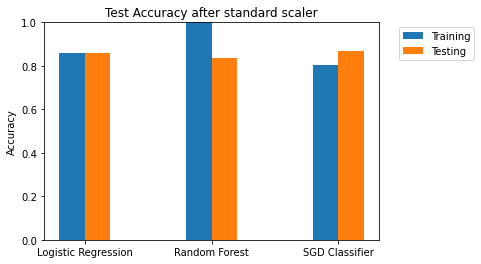

In [37]:
# Comparsion of accuracy of all 3 models after standard scalling

labels = ['Logistic Regression', 'Random Forest','SGD Classifier']
training_scores = [lr_train_score_for_ss, rf_train_score_for_ss, sgd_train_score_for_ss]
testing_scores =  [lr_train_score_for_ss, rf_test_score_for_ss, sgd_test_score_for_ss]

x = np.arange(len(labels))  # the label locations
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Test Accuracy after standard scaler')
plt.show()

#After standard scalling, accuracy of logistic regression model is still same, while accuracy of SGD classifier model is increased.

###  Min Max Scaler With all 3 model

In [38]:
scaler_MM= MinMaxScaler()
scaler_MM.fit(X)
scaled_data_minmax = scaler_MM.transform(X)
scaled_data_minmax

scaled_data_mm = pd.DataFrame(scaled_data_minmax, columns=X.columns, index=X.index);

scaled_data_mm.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177
std,0.189210,0.466011,0.344017,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.541667,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667
75%,0.666667,1.000000,0.666667,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data_mm, Y, test_size=0.2,  random_state = 51)
print("Shape of X_train= ",X_train.shape)
print("Shape of X_test= ",X_test.shape)
print("Shape of y_train= ",Y_train.shape)
print("Shape of y_test= ",Y_test.shape)

Shape of X_train=  (242, 13)
Shape of X_test=  (61, 13)
Shape of y_train=  (242,)
Shape of y_test=  (61,)


### Logistic Model (min max scaling)

In [40]:
# Fit the model
lr_classifier.fit(X_train, Y_train)

# Let's see what the classifier has learned
lr_classifier.classes_

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67742D+02    |proj g|=  2.26667D+01

At iterate    1    f=  1.46193D+02    |proj g|=  3.44510D+01

At iterate    2    f=  1.21231D+02    |proj g|=  1.88790D+01

At iterate    3    f=  1.06412D+02    |proj g|=  5.23810D+00

At iterate    4    f=  1.03511D+02    |proj g|=  3.78277D+00

At iterate    5    f=  1.01102D+02    |proj g|=  3.64958D+00

At iterate    6    f=  9.93355D+01    |proj g|=  1.46859D+00

At iterate    7    f=  9.88876D+01    |proj g|=  5.15992D-01

At iterate    8    f=  9.87358D+01    |proj g|=  5.07876D-01

At iterate    9    f=  9.85853D+01    |proj g|=  4.48861D-01

At iterate   10    f=  9.84911D+01    |proj g|=  1.97901D-01

At iterate   11    f=  9.84705D+01    |proj g|=  2.25209D-01

At iterate   12    f=  9.84692D+01    |proj g|=  1.79254D-01

At iterate   13    f=  9.8

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


array([0, 1])

     0   1.677D-04   9.846D+01
  F =   98.459950346628375     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [41]:
# Accuracy scores on the training and testing sets

lr_train_score_for_mms = lr_classifier.score(X_train, Y_train)
lr_test_score_for_mms = lr_classifier.score(X_test, Y_test)

print ("Train score:",lr_train_score_for_mms)
print ("Train score:",lr_test_score_for_mms)


Train score: 0.8512396694214877
Train score: 0.8032786885245902


In [42]:
# The confusion matrix
lr_predictions = lr_classifier.predict(X_test)
labels = lr_classifier.classes_

# compute TP, TN, FP, FN values
lr_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
lr_cr = classification_report(y_true=Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(lr_cm, index=labels, columns=labels)

,0,1
0,23,7
1,5,26


### SGD (min max scaling))

In [43]:
# Fit the model
sgd_classifier.fit(X_train, Y_train)

SGDClassifier(random_state=0, tol=1e-05)

In [44]:
# Accuracy scores on the training and testing sets

sgd_train_score_for_mms = sgd_classifier.score(X_train, Y_train)
sgd_test_score_for_mms = sgd_classifier.score(X_test, Y_test)

print ("Train score:",sgd_train_score_for_mms)
print ("Train score:",sgd_test_score_for_mms)


Train score: 0.8512396694214877
Train score: 0.819672131147541


In [45]:
# The confusion matrix

sgd_predictions = sgd_classifier.predict(X_test)

labels = sgd_classifier.classes_

# compute TP, TN, FP, FN values
sgd_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
sgd_cr = classification_report(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(sgd_cm, index=labels, columns=labels)

,0,1
0,22,8
1,3,28


### Random Forest  (min max scaling))

In [46]:
# Fit the model
rf_classifier.fit(X_train, Y_train) 

RandomForestClassifier()

In [47]:
# Accuracy scores on the training and testing sets

rf_train_score_for_mms = rf_classifier.score(X_train, Y_train)
rf_test_score_for_mms = rf_classifier.score(X_test, Y_test)

print ("Train score:",rf_train_score_for_mms)
print ("Train score:",rf_test_score_for_mms)

Train score: 1.0
Train score: 0.8032786885245902


In [48]:
# The confusion matrix

rf_predictions = rf_classifier.predict(X_test)

labels = rf_classifier.classes_

# compute TP, TN, FP, FN values
rf_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
rf_cr = classification_report(y_true=Y_test, 
                      y_pred = rf_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(rf_cm, index=labels, columns=labels)

,0,1
0,22,8
1,4,27


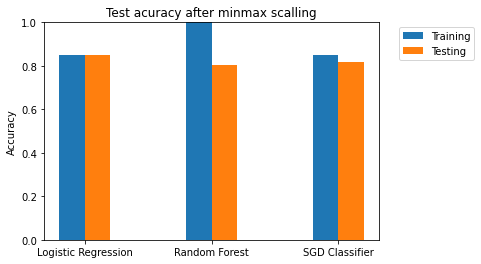

In [49]:
# Comparsion the accuracy of all 3 model after min max scalling

labels = ['Logistic Regression', 'Random Forest','SGD Classifier']
training_scores = [lr_train_score_for_mms, rf_train_score_for_mms, sgd_train_score_for_mms]
testing_scores =  [lr_train_score_for_mms, rf_test_score_for_mms, sgd_test_score_for_mms]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Test acuracy after minmax scalling')
plt.show()

After min max scalling, accuracy for logistic regression is still same, while accuracy of SGD classifier is increased.

Summary: Accuracy of Random forest model is better than other model, its performance is still consistent after scalling. whiel there is no changes in logistic regrssion model after scalling. and accuracy of the SGD classifier model is increasing after scalling.